In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_train = pd.read_csv('./data/train.csv')
df_train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51


In [80]:
df_test = pd.read_csv('./data/test.csv')
df_test

,id,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,TEST_000,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,2.641,361.505,4,2,7,2.635,92.76
1,TEST_001,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2,0.585,370.399,5,0,3,0.585,68.31
2,TEST_002,Cc1cccc(NC(=N)/N=c2\nc(O)c(Cc3ccccc3)c(C)[nH]2)c1,4.276,347.414,4,4,5,4.290,92.86
3,TEST_003,O=C(c1nc2ncccn2n1)N1CCCn2cc(-c3ccccc3)nc21,1.795,345.358,5,0,2,1.795,81.21
4,TEST_004,CCN1CCN(C(=O)c2cc3c(=O)n4cc(C)ccc4nc3n2C)CC1,1.219,353.418,4,0,2,0.169,61.15
...,...,...,...,...,...,...,...,...,...
478,TEST_478,CCc1noc(CC)c1CC(=O)NCC1(CC)CCCCC1,4.207,306.443,2,1,7,4.207,55.13
479,TEST_479,CC(=O)N1CCC2(CC1)OC(=O)C(C)=C2C(=O)N1CCN(C)CC1,-0.608,335.398,5,0,1,-1.736,70.16
480,TEST_480,CC(C)NC(=O)CN1C(=O)c2ccccc2N2C(=O)c3ccccc3C12,1.792,349.383,3,1,3,1.792,69.72
481,TEST_481,Cn1cc(Br)c(=O)c(NC(=O)c2ccc(O)cc2F)c1,0.790,341.132,3,2,2,0.423,69.64


In [81]:
df_sample = pd.read_csv('./data/sample_submission.csv')
df_sample

,id,MLM,HLM
0,TEST_000,0,0
1,TEST_001,0,0
2,TEST_002,0,0
3,TEST_003,0,0
4,TEST_004,0,0
...,...,...,...
478,TEST_478,0,0
479,TEST_479,0,0
480,TEST_480,0,0
481,TEST_481,0,0


In [82]:
# column 순서 조절 및 'id' drop
new_column_order = ['id', 'MLM', 'HLM', 'SMILES', 'AlogP', 'Molecular_Weight',
                    'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD',
                    'Molecular_PolarSurfaceArea']

df_train = df_train[new_column_order]
df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

df_train

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
0,26.010,50.680,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,3.259,400.495,5,2,8,3.259,117.37
1,29.270,50.590,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,2.169,301.407,2,1,2,2.172,73.47
2,5.586,80.892,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,1.593,297.358,5,0,3,1.585,62.45
3,5.710,2.000,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,4.771,494.652,6,0,5,3.475,92.60
4,93.270,99.990,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,2.335,268.310,3,0,1,2.337,42.43
...,...,...,...,...,...,...,...,...,...,...
3493,1.556,3.079,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,3.409,396.195,3,1,5,3.409,64.74
3494,35.560,47.630,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,1.912,359.381,4,1,3,1.844,77.37
3495,56.150,1.790,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,1.941,261.320,3,1,6,2.124,70.14
3496,0.030,2.770,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.989,284.696,5,1,5,0.989,91.51


In [83]:
import sweetviz as sw

analyze_report = sw.analyze(df_train)
analyze_report.show_html('train_output.html', open_browser= True)

                                             |          | [  0%]   00:00 -> (? left)

Report train_output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [84]:
comparison_report = sw.compare(df_train, df_test)
comparison_report.show_html('train_test_compare_output.html', open_browser= True)

                                             |          | [  0%]   00:00 -> (? left)

Report train_test_compare_output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [85]:
# ! pip install rdkit

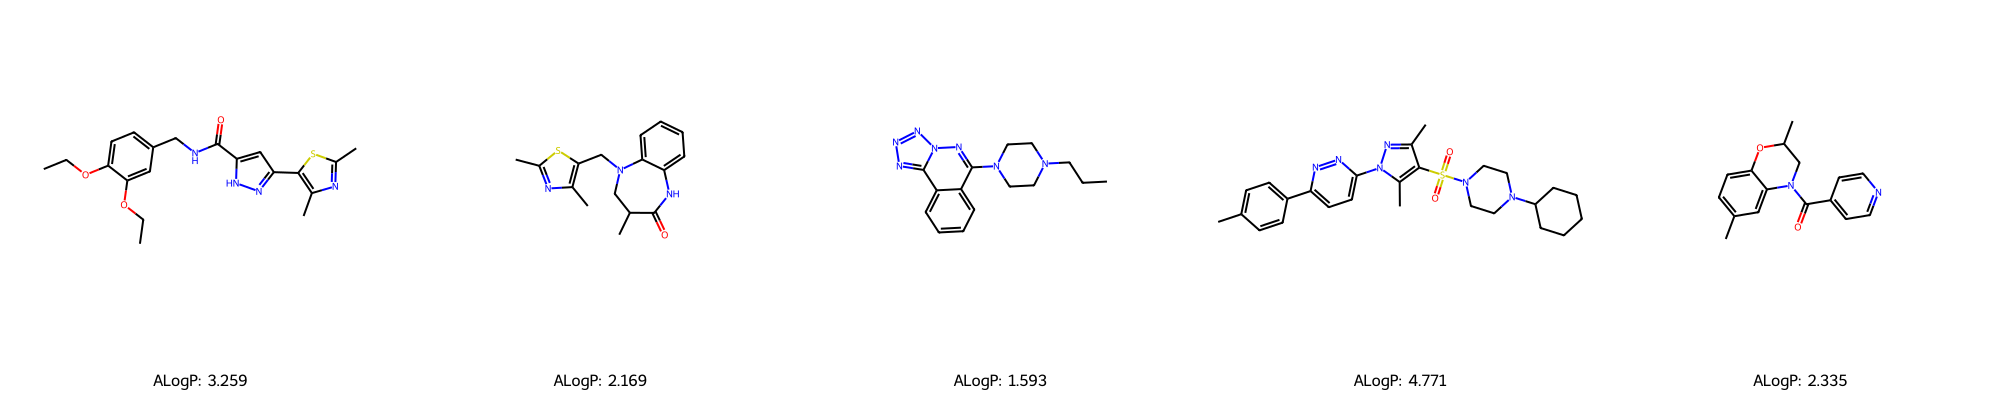

In [86]:
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, Descriptors, AllChem
from rdkit.Chem.Draw import IPythonConsole

def show_smiles(smiles):
  smiles = smiles['SMILES']
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

  # Draw the first molecules
  img = Draw.MolsToGridImage(molecules[:5], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'ALogP: {round(x, 3)}' for x in df_train['AlogP']], 
                             returnPNG=False)
                             
  from IPython.display import display, Image
  display(img)

show_smiles(df_train)

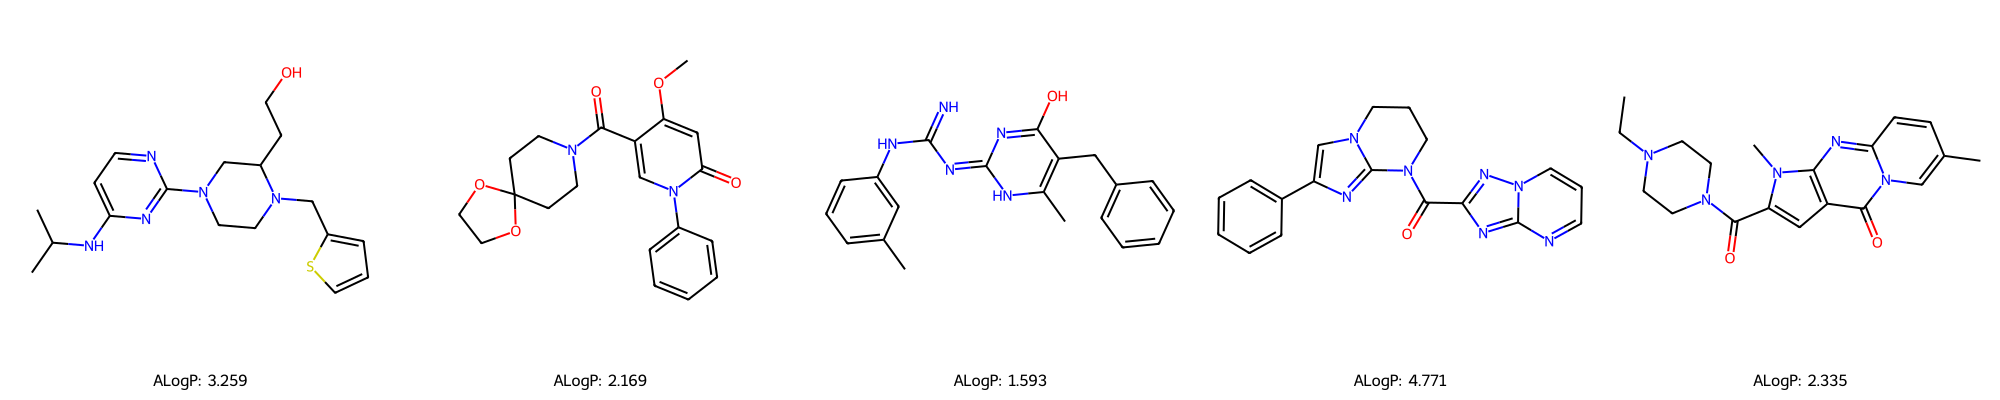

In [87]:
show_smiles(df_test)

In [88]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    
    return summary

resumetable(df_train)

데이터 세트 형상: (3498, 10)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,MLM,float64,0,2735,26.01,29.27
1,HLM,float64,0,2781,50.68,50.59
2,SMILES,object,0,3471,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1
3,AlogP,float64,2,2561,3.259,2.169
4,Molecular_Weight,float64,0,3052,400.495,301.407
5,Num_H_Acceptors,int64,0,15,5,2
6,Num_H_Donors,int64,0,10,2,1
7,Num_RotatableBonds,int64,0,20,8,2
8,LogD,float64,0,2635,3.259,2.172
9,Molecular_PolarSurfaceArea,float64,0,2164,117.37,73.47


In [89]:
resumetable(df_test)

데이터 세트 형상: (483, 8)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값
0,SMILES,object,0,483,CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1,COc1cc(=O)n(-c2ccccc2)cc1C(=O)N1CCC2(CC1)OCCO2
1,AlogP,float64,1,465,2.641,0.585
2,Molecular_Weight,float64,0,469,361.505,370.399
3,Num_H_Acceptors,int64,0,12,4,5
4,Num_H_Donors,int64,0,6,2,0
5,Num_RotatableBonds,int64,0,14,7,3
6,LogD,float64,0,466,2.635,0.585
7,Molecular_PolarSurfaceArea,float64,0,430,92.76,68.31


In [90]:
# SMILES : 분자 구조
# MLM : mouse liver microsome 쥐의 간을 이용한 약물 대사 반응치
# HLM : human liver microsome 사람 간을 이용한 약물 대사 반응치
# AlogP : 유기 화합물의 수분해성 (낮을수록 수분해성이 높음)
# LogD : 
# Molecular_Weight
# Num_H_Acceptors
# Num_H_Donors
# Num_RotatableBonds
# Molecular_PolarSurfaceArea

## AlogP는 MCAR, MAR, NMAR 어떤 종류의 결측값인가?
MCAR: If the missing values do not have any relation to the column it belongs to and with the rest of the columns in the dataset then it is called Missing Completely at Random.   
MAR: If the missing values do not have any relation to the column it belongs to but have a relation with any other columns in the dataset it is called Missing At Random   
MNAR: If the missing values do have a relation to the column it belongs to but do not have a relation with any other columns in the dataset it is called Missing Not at Random.

In [91]:
# AlogP는 MAR에 가깝다고 추정 / Molecular_Weight, Num_H_Acceptors 등 다른 열 정보로 추정이 가능하지 않을까.
# LogD와 상관관계가 상당히 높음

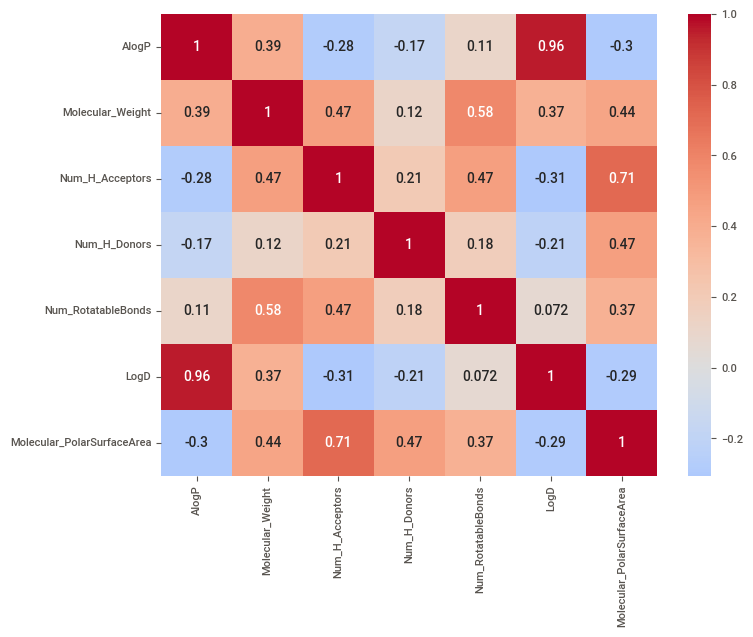

In [101]:
df_corr = df_train.iloc[:, 3:]
corr_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0);

In [93]:
df_train[df_train.AlogP.isna()]

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
2796,0.549,0.2,[H][C@]1(CC[C@@]2([H])[C@@H](C)C=CC3=C[C@H](C)...,NaN,418.566,5,1,7,4.634,72.83
3387,0.240,3.2,COc1cc2c(cc1OC)/C(=N\c1ccccc1)N(Cc1ccccc1F)CC2,NaN,390.450,3,0,5,4.911,34.06


27 쌍의 이상 데이터 / input값이 동일하나 MLM HLM이 다름

In [94]:
# 출력 제한 100줄로 조정
pd.set_option('display.max_rows', 100)

duplicated_rows = df_train[df_train.iloc[:, 3:].duplicated(keep=False)]
sorted_duplicates = duplicated_rows.sort_values(by='SMILES', ascending=False)

sorted_duplicates

,MLM,HLM,SMILES,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
3265,10.930,20.330,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
2134,1.416,1.404,O=S(=O)(c1ccccc1)n1ccc(C/C=C/Cc2ccn(S(=O)(=O)c...,5.630,466.572,4,0,8,5.630,94.90
2159,113.210,99.000,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
2332,0.007,0.038,N#Cc1nccnc1OC1CCN(C(=O)N2CCNC2=O)C1,-0.533,302.289,6,1,2,-0.533,111.44
216,40.530,87.780,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7,0,4,-1.133,108.65
2850,99.900,99.900,N#Cc1nccnc1OC1CCN(C(=O)C2CC(=O)N(C3CCOCC3)C2)C1,-1.133,385.417,7,0,4,-1.133,108.65
3346,80.700,90.890,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6,1,4,4.304,113.53
2575,31.926,36.574,Cc1ccccc1-c1nc2ccccc2cc1C(C)n1c(=O)[nH]c2c(S(C...,4.304,459.520,6,1,4,4.304,113.53
918,2.740,1.140,Cc1cccc(-n2nc(-c3cnn(C)c3C)c(Cl)c2-c2cnn(C)c2C)c1,4.554,380.874,3,0,3,4.555,53.46
779,0.140,0.150,Cc1ccc(OCCOCCN2CC(C)OC(C)C2)c(Br)c1,0.035,462.332,8,2,8,-0.550,105.53
